### This script contains the following:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity


### Importing libraries and data

In [23]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [24]:
# Configure API key
quandl.ApiConfig.api_key= '_8sjXWnP1jjJVx_iNX3U'

In [25]:
#Create a path
path = r'C:\Users\manny\Documents\Circulatory Death Analysis'

In [26]:
#Import data
data=pd.read_csv(r'C:\Users\manny\Documents\Circulatory Death Analysis\02 Data\Original Data\mortalitytime.csv',index_col=False)

 ### Subsetting, wrangling, and cleaning time-series data

####  Hypothesis:
The incidence of deaths caused by circulatory system diseases has increased significantly over the past 5 years.

#### Null Hypothesis:
There is no significant increase in the incidence of deaths caused by circulatory system diseases over the past 5 years.

In [27]:
data.head(5)

,State,State Code,Year,Month,Month Code,Deaths
0,Alabama,1,2015,"Jan., 2015",2015/01,1614
1,Alabama,1,2015,"Feb., 2015",2015/02,1476
2,Alabama,1,2015,"Mar., 2015",2015/03,1540
3,Alabama,1,2015,"Apr., 2015",2015/04,1381
4,Alabama,1,2015,"May, 2015",2015/05,1281


In [28]:
data['Month Code'] = pd.to_datetime(data['Month Code'])

In [29]:
data.dtypes

State                 object
State Code             int64
Year                   int64
Month                 object
Month Code    datetime64[ns]
Deaths                 int64
dtype: object

In [30]:
# Create a subset  from the data.
columns= ['Month Code', 'Deaths']

In [31]:
df= data[columns]

In [32]:
df.head()

,Month Code,Deaths
0,2015-01-01,1614
1,2015-02-01,1476
2,2015-03-01,1540
3,2015-04-01,1381
4,2015-05-01,1281


In [33]:
df.size

7344

In [34]:
#Setting month code as index
df.set_index(keys=['Month Code'], drop=True, inplace=True)


In [35]:
df.head()


,Deaths
Month Code,
2015-01-01,1614
2015-02-01,1476
2015-03-01,1540
2015-04-01,1381
2015-05-01,1281


In [37]:
# new dataset including the date and the total number of people injured in accidents on that day
df_1= df.groupby('Month Code')['Deaths'].sum()

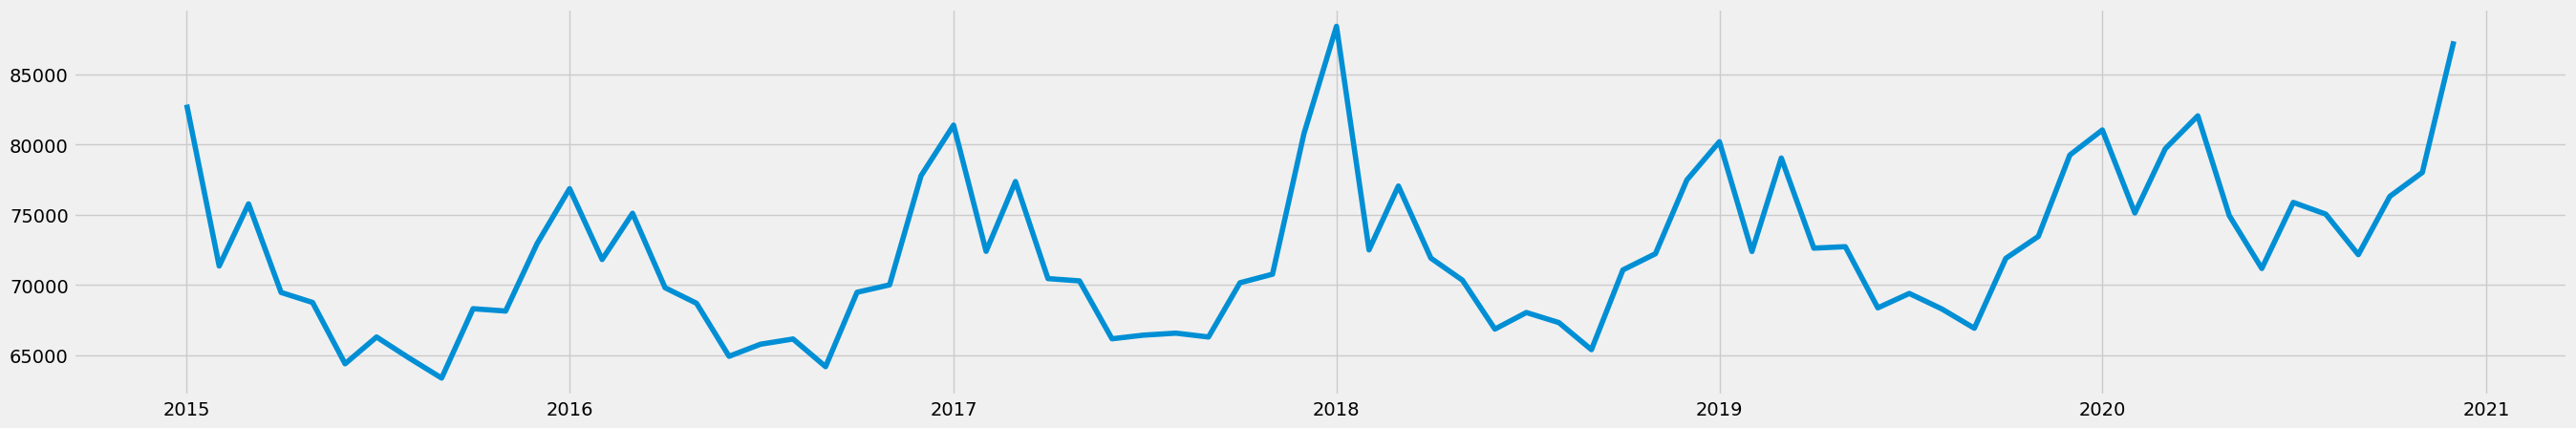

In [38]:
# Plot the data using matplotlib.

plt.figure(figsize=(30,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_1)

### Time series analysis: decomposition

In [39]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_1, model='additive')a

In [40]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

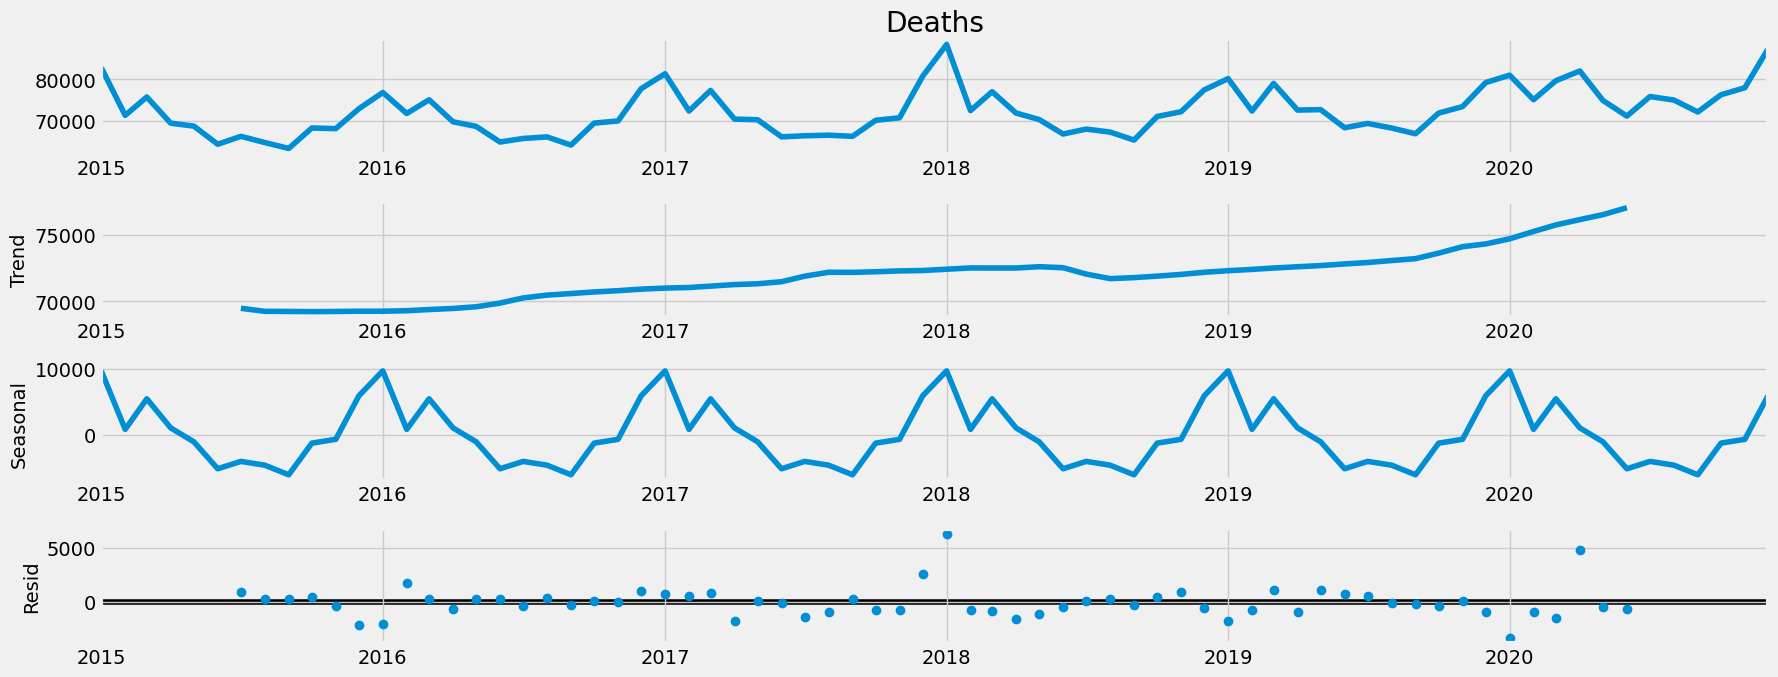

In [41]:
# Plot the separate components

decomposition.plot()
plt.show()

### Testing for stationarity

In [48]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.098384e+00
p-value                        9.972176e-08
Number of Lags Used            2.500000e+01
Number of Observations Used    3.646000e+03
Critical Value (1%)           -3.432145e+00
Critical Value (5%)           -2.862333e+00
Critical Value (10%)          -2.567192e+00
dtype: float64


#### Test statistic smaller than critical value = can reject null hypothesis


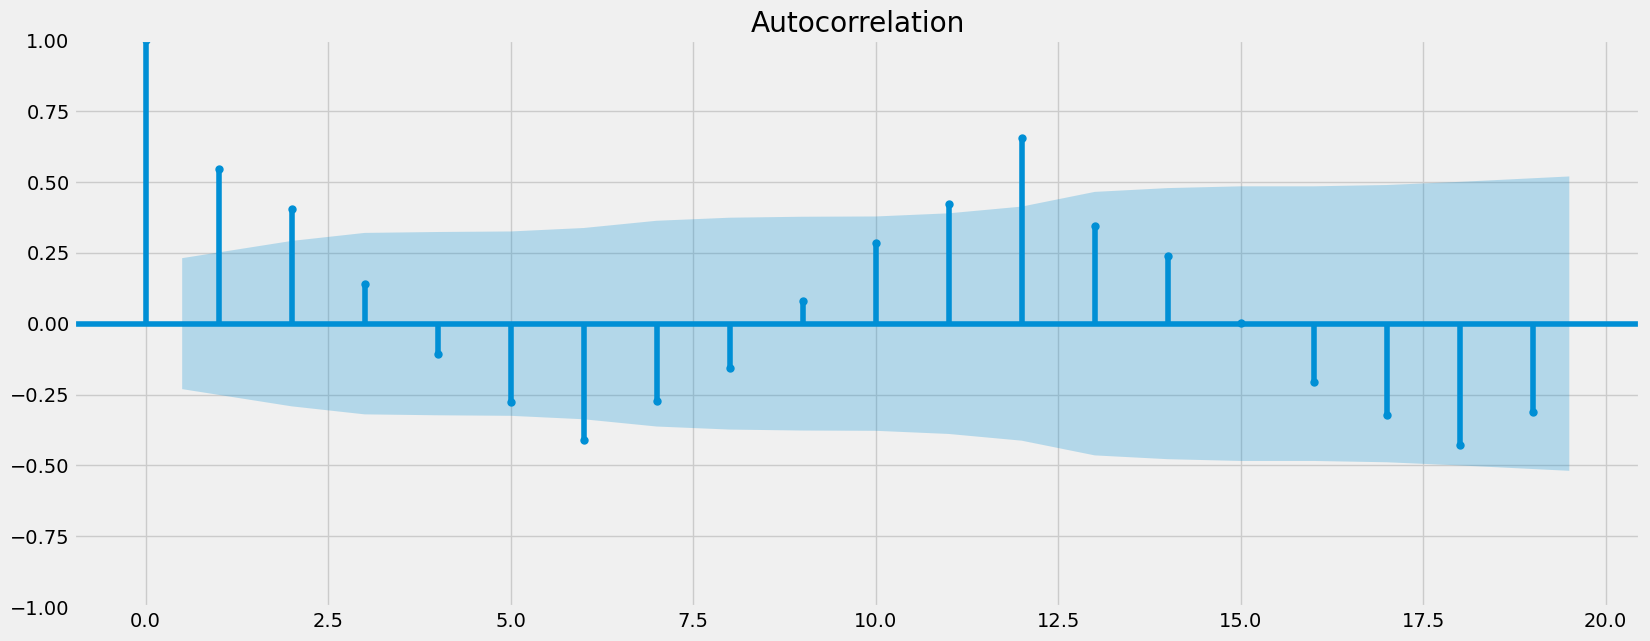

In [45]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_1)
plt.show()

#### There are a total of 20 lags in the series. Out of all the lags, only 6 are beyond the confidence level, hence it can be deduced that it is stationary.